In [75]:
# Installing modules

import re
import requests
import pandas as pd

from matplotlib import pyplot as plt

In [76]:
# Important functions

def convert_to_df(data):
    # Initialize lists to store extracted data
    ids = []
    descriptions = []
    create_times = []
    author_ids = []
    author_nicknames = []
    music_ids = []
    music_titles = []
    digg_counts = []
    share_counts = []
    comment_counts = []
    play_counts = []
    follower_counts = []

    # Process each record
    for record in data["data"]:
        record = record["item"]
        ids.append(record['id'])
        descriptions.append(record['desc'])
        create_times.append(record['createTime'])
        author_ids.append(record['author']['id'])
        author_nicknames.append(record['author']['nickname'])
        music_ids.append(record['music']['id'])
        music_titles.append(record['music']['title'])
        digg_counts.append(record['stats']['diggCount'])
        share_counts.append(record['stats']['shareCount'])
        comment_counts.append(record['stats']['commentCount'])
        play_counts.append(record['stats']['playCount'])

    # Create a dataframe
    df = pd.DataFrame({
        'ID': ids,
        'Description': descriptions,
        'Create Time': create_times,
        'Author ID': author_ids,
        'Author Nickname': author_nicknames,
        'Music ID': music_ids,
        'Music Title': music_titles,
        'Digg Count': digg_counts,
        'Share Count': share_counts,
        'Comment Count': comment_counts,
        'Play Count': play_counts,
    })

    # Derive Engagement Rate
    df['Engagement Rate'] = (df['Digg Count'] + df['Comment Count'] + df['Share Count']) / df['Play Count']

    return df

In [80]:
# The provided URL for the API

querys = ["whiteclaw", "whiteclaw spain", "spain", "whiteclaw water", "white claw sparkling water", "white claw latest", "whiteclaw latest", "whiteclaw trending", "whiteclaw challenges"]

def fetch_info(querys):
    full = pd.DataFrame()
    for q in querys:
        url = f"https://www.tiktok.com/api/search/general/full/?WebIdLastTime=1719779899&aid=1988&app_language=en&app_name=tiktok_web&browser_language=en-GB&browser_name=Mozilla&browser_online=true&browser_platform=MacIntel&browser_version=5.0%20%28Macintosh%3B%20Intel%20Mac%20OS%20X%2010_15_7%29%20AppleWebKit%2F537.36%20%28KHTML%2C%20like%20Gecko%29%20Chrome%2F126.0.0.0%20Safari%2F537.36&channel=tiktok_web&cookie_enabled=true&device_id=7386382491231749674&device_platform=web_pc&device_type=web_h264&focus_state=true&from_page=search&history_len=19&is_fullscreen=true&is_page_visible=true&keyword={q}&offset=0&os=mac&priority_region=&referer=&region=US&root_referer=https%3A%2F%2Fwww.tiktok.com%2F&screen_height=832&screen_width=1280&search_source=normal_search&tz_name=America%2FNew_York&verifyFp=verify_ly201g81_sWJAN7Uo_CMar_4gxi_B7R6_vov0aQzTlQtI&web_search_code=%7B%22tiktok%22%3A%7B%22client_params_x%22%3A%7B%22search_engine%22%3A%7B%22ies_mt_user_live_video_card_use_libra%22%3A1%2C%22mt_search_general_user_live_card%22%3A1%7D%7D%2C%22search_server%22%3A%7B%7D%7D%7D&webcast_language=en&msToken=Qjldgis_t8d_bwKGyCMf7vWPC3f4jIh3Cruv9PUOnOBtLIANcv3QtRYwmPt4_4YhDu16WC_wnj_rhb9mdTL1JFduGfU9zwpso5vPGTXZu7HSsB31McHbR60wHt--Doeq6gj40bRS4n8r-Hy4JVy61QE=&X-Bogus=DFSzswVOSGsANJoVt3664ELNKBOr&_signature=_02B4Z6wo00001Z8c8ogAAIDCzePSkIHtjIWfHPYAAAFHeb"

        # Make a request to the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code == 200:
            fdata = response.json()
            data = convert_to_df(fdata)
            full = pd.concat([full, data])
            print("Data fetched successfully:")
        else:
            print("Failed to fetch data from the API. Status code:", response.status_code)

    return full, fdata

data, raw_data = fetch_info(querys)
data.head()

Data fetched successfully:
Data fetched successfully:
Data fetched successfully:
Data fetched successfully:
Data fetched successfully:
Data fetched successfully:
Data fetched successfully:
Data fetched successfully:
Data fetched successfully:


,ID,Description,Create Time,Author ID,Author Nickname,Music ID,Music Title,Digg Count,Share Count,Comment Count,Play Count,Engagement Rate
0,7169053647245020458,Bless her heart! #HuluChippendalesDance #BeThe...,1669175392,6589773046515941382,Ryan Odom,7169053724621572910,original sound,67700,62,75,469400,0.144519
1,7080281296659909934,like okay calm down stacy there's only 5% in a...,1648506452,6716555753459401734,Karol,7055883490604436229,FAMOUS PEOPLE ARE USING THIS SOUND OMG,27500,127,209,153800,0.180988
2,7099503371643637038,"Don’t be shy claw lovers, which is your go-to ...",1652981941,6713997619171197958,delish,6840186129753328389,sonido original,1215,39,39,76700,0.016858
3,7332932181079313710,Going through my #drafts and found this gem 💎 ...,1707331367,6767780616467497990,KaySquad_,7299596010534505262,original sound,34900,691,466,620400,0.058119
4,6909544692682149125,comment your fav! 🥂 #whiteclaw #alcoholicdrink...,1608753751,6712189871371387909,LOUIS LEVANTI,6746993352891189249,Monkeys Spinning Monkeys,22200,667,543,191100,0.122501


In [78]:
# Store Hashtags

def get_hashtags(data):
    data["Hashtags"] = data["Description"].apply(lambda x: re.findall(r'#(\w+)', x))

    return data

data = get_hashtags(data)

<ipython-input-79-526c16657559>:25: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


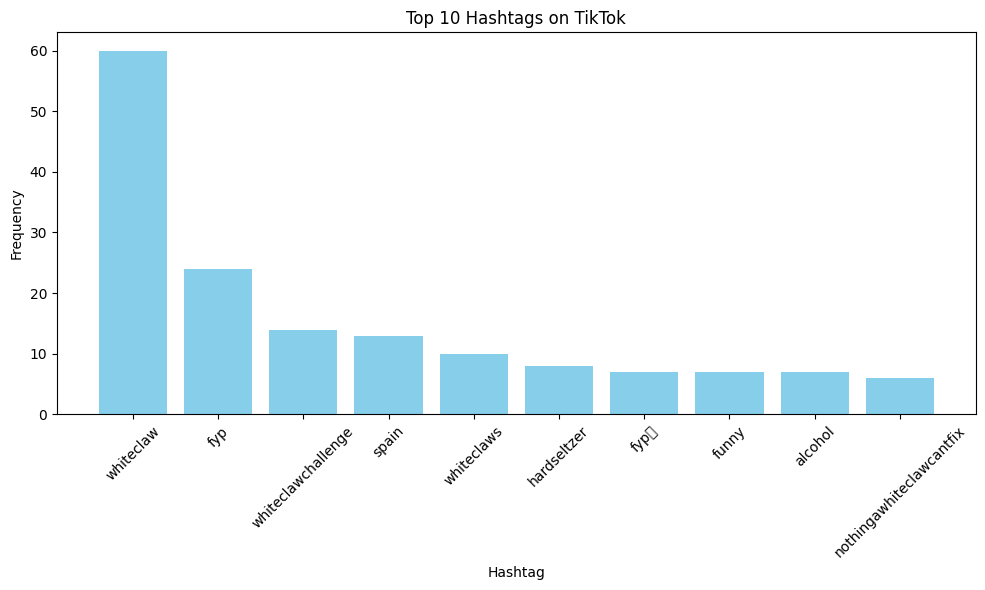

In [79]:
# Flatten list of hashtags
all_hashtags = [hashtag.lower() for hashtags_list in data['Hashtags'] for hashtag in hashtags_list]

# Create frequency dictionary
frequency_dict = {}
for hashtag in all_hashtags:
    if hashtag in frequency_dict:
        frequency_dict[hashtag] += 1
    else:
        frequency_dict[hashtag] = 1

# Convert to DataFrame for easier manipulation (optional)
frequency_df = pd.DataFrame(list(frequency_dict.items()), columns=['Hashtag', 'Frequency'])

# Sort by frequency
frequency_df = frequency_df.sort_values(by='Frequency', ascending=False)

# Plot top 10 hashtags by frequency
plt.figure(figsize=(10, 6))
plt.bar(frequency_df['Hashtag'][:10], frequency_df['Frequency'][:10], color='skyblue')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.title('Top 10 Hashtags on TikTok')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
# Save the data

data.to_csv("tiktok_data.csv", index=False)